<a href="https://colab.research.google.com/github/gaditi123/quant/blob/main/Portfolio_optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quandl

In [19]:
import pandas as pd
import quandl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
start = pd.to_datetime('2017-01-01')
end = pd.to_datetime('2021-01-01')

In [7]:
aapl = quandl.get('WIKI/AAPL.11',start_date = start,                  end_date = end)
cisco = quandl.get('WIKI/CSCO.11',                   start_date = start,                   end_date = end)
ibm = quandl.get('WIKI/IBM.11',                 start_date = start,                 end_date = end)
amzn = quandl.get('WIKI/AMZN.11',                  start_date = start,                  end_date = end)

In [9]:
aapl.head()

,Adj. Close
Date,
2017-01-03,114.715378
2017-01-04,114.586983
2017-01-05,115.169696
2017-01-06,116.453639
2017-01-09,117.520300


In [10]:
stocks = pd.concat([aapl, cisco, ibm, amzn],axis = 1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [11]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2017-01-03,114.715378,29.484966,160.939852,753.67
2017-01-04,114.586983,29.311184,162.932468,757.18
2017-01-05,115.169696,29.379349,162.393403,780.45
2017-01-06,116.453639,29.437777,163.192375,795.99
2017-01-09,117.520300,29.389087,161.382655,796.92


In [12]:
stocks.pct_change(1).mean()

aapl     0.001323
cisco    0.001271
ibm     -0.000123
amzn     0.002332
dtype: float64

In [13]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.418777,0.226460,0.510797
cisco,0.418777,1.000000,0.389988,0.320325
ibm,0.226460,0.389988,1.000000,0.188926
amzn,0.510797,0.320325,0.188926,1.000000


Log returns - de trending and normalising the data

In [14]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,-0.005894,0.012381,0.004657
2017-01-05,0.005085,0.002326,-0.003309,0.030732
2017-01-06,0.011148,0.001989,0.004920,0.019912
2017-01-09,0.009160,-0.001654,-0.011089,0.001168


In [17]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.001120,-0.005911,0.012305,0.004646
2017-01-05,0.005072,0.002323,-0.003314,0.030270
2017-01-06,0.011087,0.001987,0.004908,0.019716
2017-01-09,0.009118,-0.001655,-0.011151,0.001168


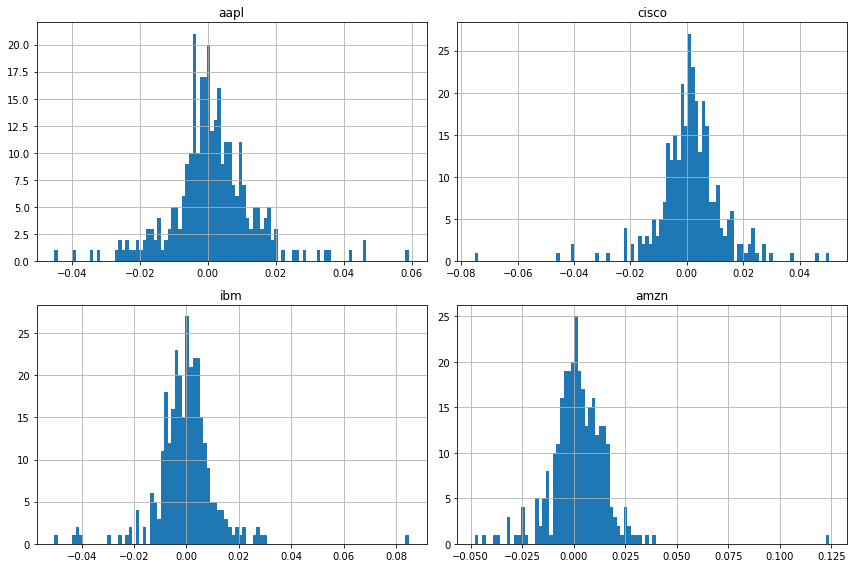

In [20]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [21]:
log_ret.mean()

aapl     0.001177
cisco    0.001201
ibm     -0.000187
amzn     0.002235
dtype: float64

In [24]:
log_ret.cov() * 252*5

,aapl,cisco,ibm,amzn
aapl,0.193608,0.078277,0.040753,0.114847
cisco,0.078277,0.175915,0.066164,0.069011
ibm,0.040753,0.066164,0.161983,0.039710
amzn,0.114847,0.069011,0.039710,0.255200


In [36]:
np.random.seed(101)
print(stocks.columns)

weights = np.array(np.random.random(4))
print("random weight",weights)

weights = weights / np.sum(weights)
print("normalised weights",weights)

# expected portfoilio return
exp_ret = np.sum(log_ret.mean()*weights) * 252*5
print("Expected return",exp_ret)

#expected volatility
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252*5,weights)))
print("Expected volatility",exp_vol)

#sharpe ratio
SR = exp_ret/exp_vol
print("SR", SR)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
random weight [0.51639863 0.57066759 0.02847423 0.17152166]
normalised weights [0.40122278 0.44338777 0.02212343 0.13326603]
Expected return 1.636077872497379
Expected volatility 0.3477147344845852
SR 4.705230208097234


In [39]:
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for i in range(num_ports):

  weights = np.array(np.random.random(4))
  weights = weights / np.sum(weights)
  all_weights[i,:] = weights

  # expected portfoilio return
  ret_arr[i] = np.sum(log_ret.mean()*weights) * 252

  #expected volatility
  vol_arr[i] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

  #sharpe ratio
  sharpe_arr[i] = ret_arr[i] / vol_arr[i]


In [40]:
sharpe_arr.max()

2.611646865165918

In [41]:
sharpe_arr.argmax()

1358

In [42]:
all_weights[1358,:]

array([0.05041405, 0.37255462, 0.00733004, 0.56970129])

In [46]:
max_sr_ret = ret_arr[1358]
max_sr_vol = vol_arr[1358]

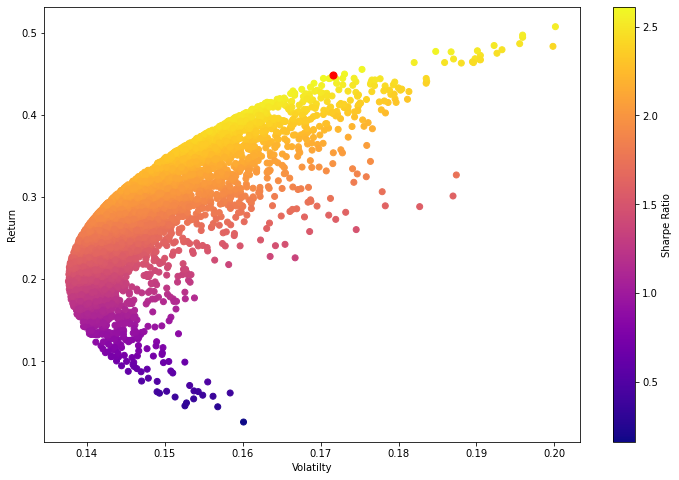

In [47]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatilty')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50)